In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("countries of the world.csv");     # 读取数据
print(data.head())      # 查看前五行数据
print(data.tail())      #查看后五行数据
print(data.info())      #数据的基本信息

           Country                               Region  Population  \
0     Afghanistan         ASIA (EX. NEAR EAST)             31056997   
1         Albania   EASTERN EUROPE                          3581655   
2         Algeria   NORTHERN AFRICA                        32930091   
3  American Samoa   OCEANIA                                   57794   
4         Andorra   WESTERN EUROPE                            71201   

   Area (sq. mi.) Pop. Density (per sq. mi.) Coastline (coast/area ratio)  \
0          647500                       48,0                         0,00   
1           28748                      124,6                         1,26   
2         2381740                       13,8                         0,04   
3             199                      290,4                        58,29   
4             468                      152,1                         0,00   

  Net migration Infant mortality (per 1000 births)  GDP ($ per capita)  \
0         23,06                     

In [7]:
print(data.corr())    #相关系数

                    Population  Area (sq. mi.)  GDP ($ per capita)
Population            1.000000        0.469985           -0.039324
Area (sq. mi.)        0.469985        1.000000            0.072185
GDP ($ per capita)   -0.039324        0.072185            1.000000


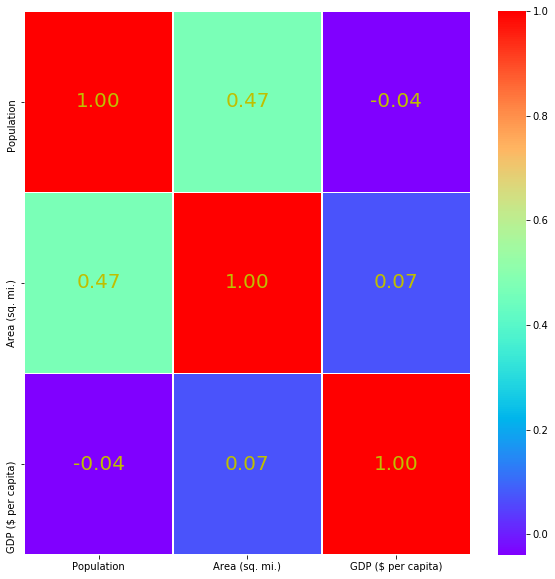

In [16]:
#correlation map
f,ax1 = plt.subplots(figsize =(10,10));
sns.heatmap(data.corr(),fmt = ".2f",annot=True,annot_kws={"color":"y","size" : 20},ax = ax1, linewidth = 0.5,cmap = 'rainbow')
plt.show()

In [21]:
print(data.columns)    # 列名
print(data.index)

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')
RangeIndex(start=0, stop=227, step=1)


In [22]:
print(data.describe())

         Population  Area (sq. mi.)  GDP ($ per capita)
count  2.270000e+02    2.270000e+02          226.000000
mean   2.874028e+07    5.982270e+05         9689.823009
std    1.178913e+08    1.790282e+06        10049.138513
min    7.026000e+03    2.000000e+00          500.000000
25%    4.376240e+05    4.647500e+03         1900.000000
50%    4.786994e+06    8.660000e+04         5550.000000
75%    1.749777e+07    4.418110e+05        15700.000000
max    1.313974e+09    1.707520e+07        55100.000000


# Seaborn

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null category
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null object
Coastline (coast/area ratio)          227 non-null object
Net migration                         227 non-null object
Infant mortality (per 1000 births)    227 non-null object
GDP ($ per capita)                    227 non-null float64
Literacy (%)                          227 non-null object
Phones (per 1000)                     227 non-null object
Arable (%)                            227 non-null object
Crops (%)                             227 non-null object
Other (%)                             227 non-null object
Climate                               227 non-null object
Birthrate               

[]

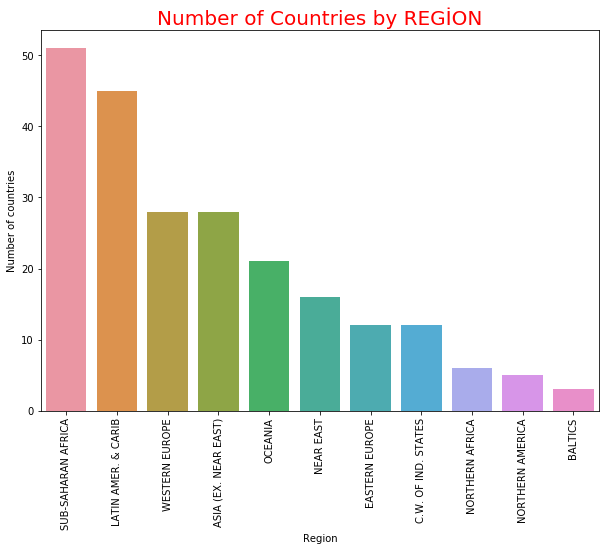

In [23]:
data.fillna(0.0,inplace = True);
data["Region"] = data["Region"].astype("category")
data["Country"] = data["Country"].astype('category')

data["Region"] = data["Region"].str.strip()

group = data.groupby("Region")
group.mean()

data.info()

region = data["Region"].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=region.index,y=region.values)
plt.xticks(rotation=90) #X轴下标旋转90°
plt.ylabel('Number of countries')    # Y轴标签
plt.xlabel('Region') # X轴标签
plt.title('Number of Countries by REGİON',color = 'red',fontsize=20)    # 图像标题
plt.plot()

[]

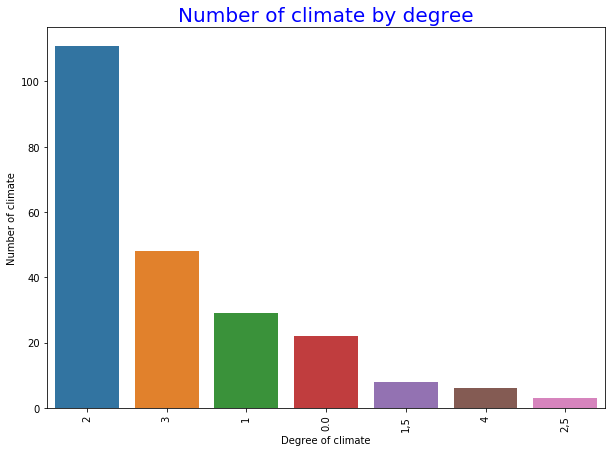

In [24]:
climate = data["Climate"].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=climate.index,y=climate.values)
plt.xticks(rotation=90)
plt.ylabel('Number of climate')
plt.xlabel('Degree of climate')
plt.title('Number of climate by degree',color = 'blue',fontsize=20)

plt.plot()

[]

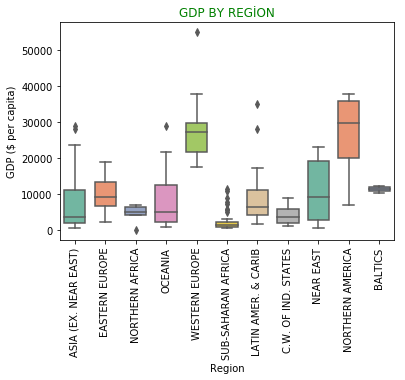

In [25]:
# Box plot
group = data.groupby("Region")
group.mean()

sns.boxplot(x=data["Region"],y=data["GDP ($ per capita)"],data=data, width=0.7,palette="Set2",fliersize=5)     # 箱型图
plt.xticks(rotation=90)
plt.title("GDP BY REGİON",color="green")

plt.plot()

[]

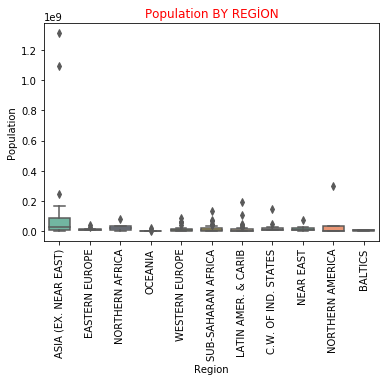

In [26]:
sns.boxplot(x=data["Region"],y=data["Population"],data=data, width=0.7,palette="Set2",fliersize=5)
plt.xticks(rotation=90)
plt.title("Population BY REGİON",color="red")

plt.plot()

[]

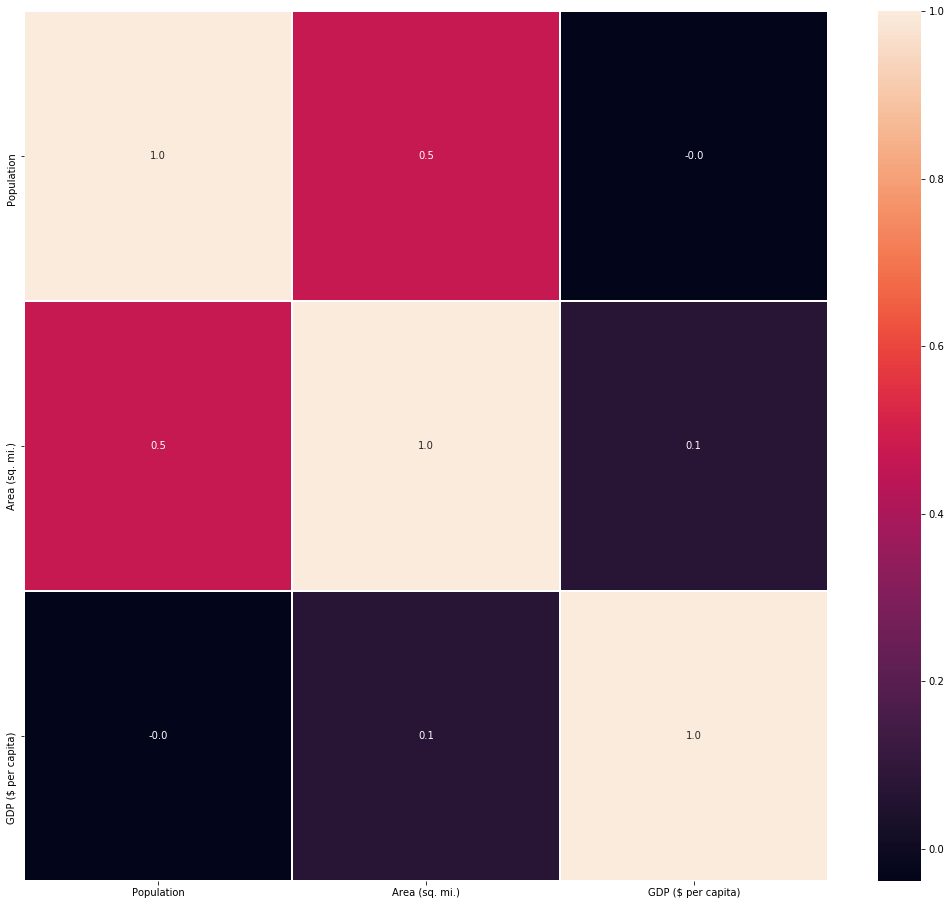

In [27]:
# heatmap
data.corr()

f,ax = plt.subplots(figsize=(18, 16))
sns.heatmap(data.corr(), annot=True, linewidths=.8, fmt= '.1f',ax=ax)

plt.plot()

In [32]:
def convertValue(val):
    newVal = val.replace(',','.')
    return float(newVal)

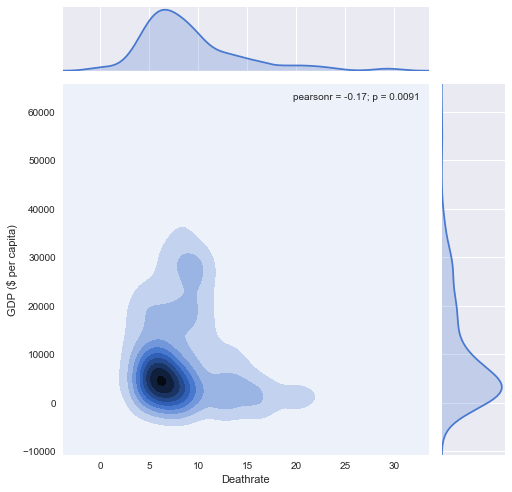

In [33]:
# jointplot
data["Deathrate"] = data["Deathrate"].astype(str)
data["Deathrate"] = data["Deathrate"].apply(convertValue)
data["GDP ($ per capita)"] = data["GDP ($ per capita)"].astype(str)
data["GDP ($ per capita)"] = data["GDP ($ per capita)"].apply(convertValue)

g = sns.jointplot(data["Deathrate"], data["GDP ($ per capita)"], kind="kde", size=7)
plt.show()


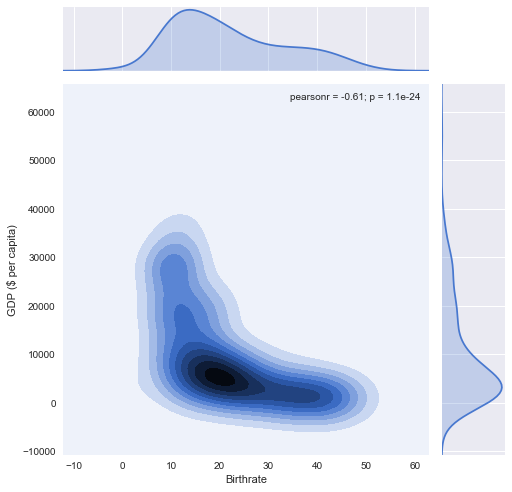

In [34]:
data["Birthrate"] = data["Birthrate"].astype(str)
data["Birthrate"] = data["Birthrate"].apply(convertValue)
data["GDP ($ per capita)"] = data["GDP ($ per capita)"].astype(str)
data["GDP ($ per capita)"] = data["GDP ($ per capita)"].apply(convertValue)

g = sns.jointplot(data["Birthrate"], data["GDP ($ per capita)"], kind="kde", size=7)
plt.show()

[]

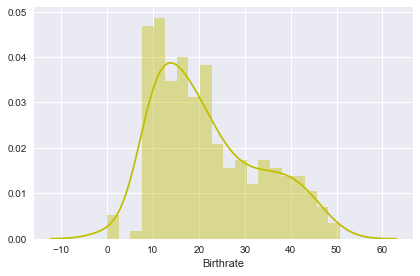

In [35]:
# Distplot
sns.set(style="darkgrid", palette="muted",font_scale=1)
sns.distplot(data["Birthrate"],bins=20,kde=True,color="y")
plt.tight_layout()#Increases the alignment of the drawn graph.
plt.plot()

[]

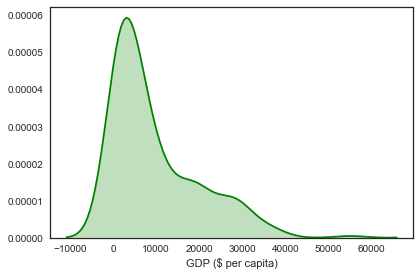

In [36]:
sns.set(style="white",palette="Blues", font_scale=1)
sns.distplot(data["GDP ($ per capita)"],hist=False,bins=20,kde=True,color="g",kde_kws={"shade":True})
plt.tight_layout()#Increases the alignment of the drawn graph.
plt.plot()

[]

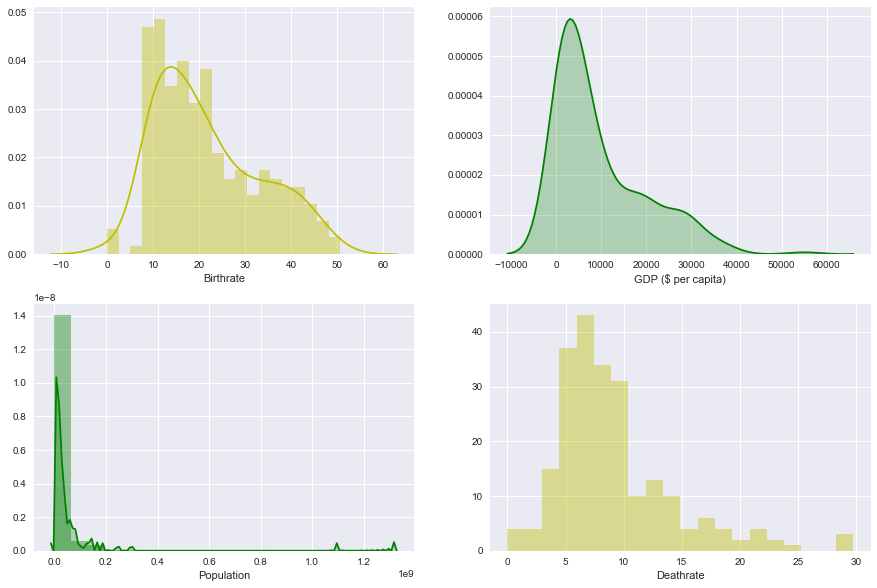

In [37]:
sns.set(style="darkgrid", palette="muted",font_scale=1)

f,axes=plt.subplots(2,2,figsize=(15,10))

sns.distplot(data["Birthrate"],bins=20,kde=True,color="y",ax=axes[0,0])

sns.distplot(data["GDP ($ per capita)"],hist=False,bins=20,kde=True,color="g",kde_kws={"shade":True},ax=axes[0,1])

sns.distplot(data["Population"],hist=True,bins=20,kde=True,color="g",kde_kws={"shade":True},ax=axes[1,0])

sns.distplot(data["Deathrate"],bins=20,kde=False,color="y",ax=axes[1,1])

plt.plot()

[]

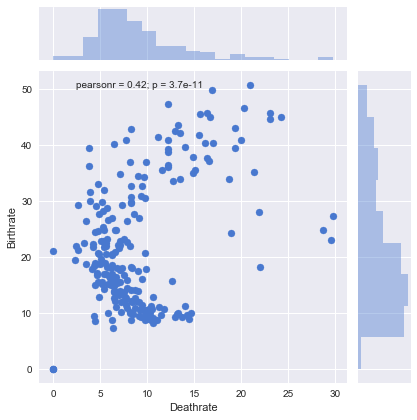

In [38]:
sns.jointplot(data["Deathrate"],data["Birthrate"],data=data)
plt.plot()

[]

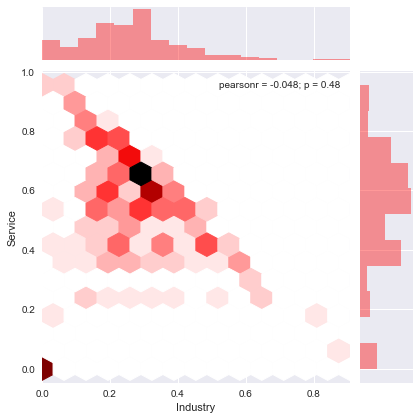

In [39]:
data["Industry"] = data["Industry"].astype(str)
data["Industry"] = data["Industry"].apply(convertValue)
data["Service"] = data["Service"].astype(str)
data["Service"] = data["Service"].apply(convertValue)

sns.jointplot(data["Industry"],data["Service"],data=data,color="r",kind="hex")

plt.plot()

[]

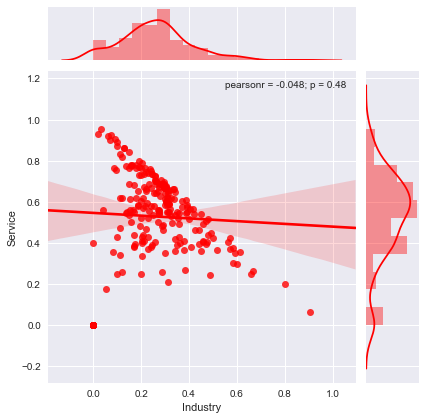

In [40]:
sns.jointplot(data["Industry"],data["Service"],data=data,color="r",kind="reg")

plt.plot()

[]

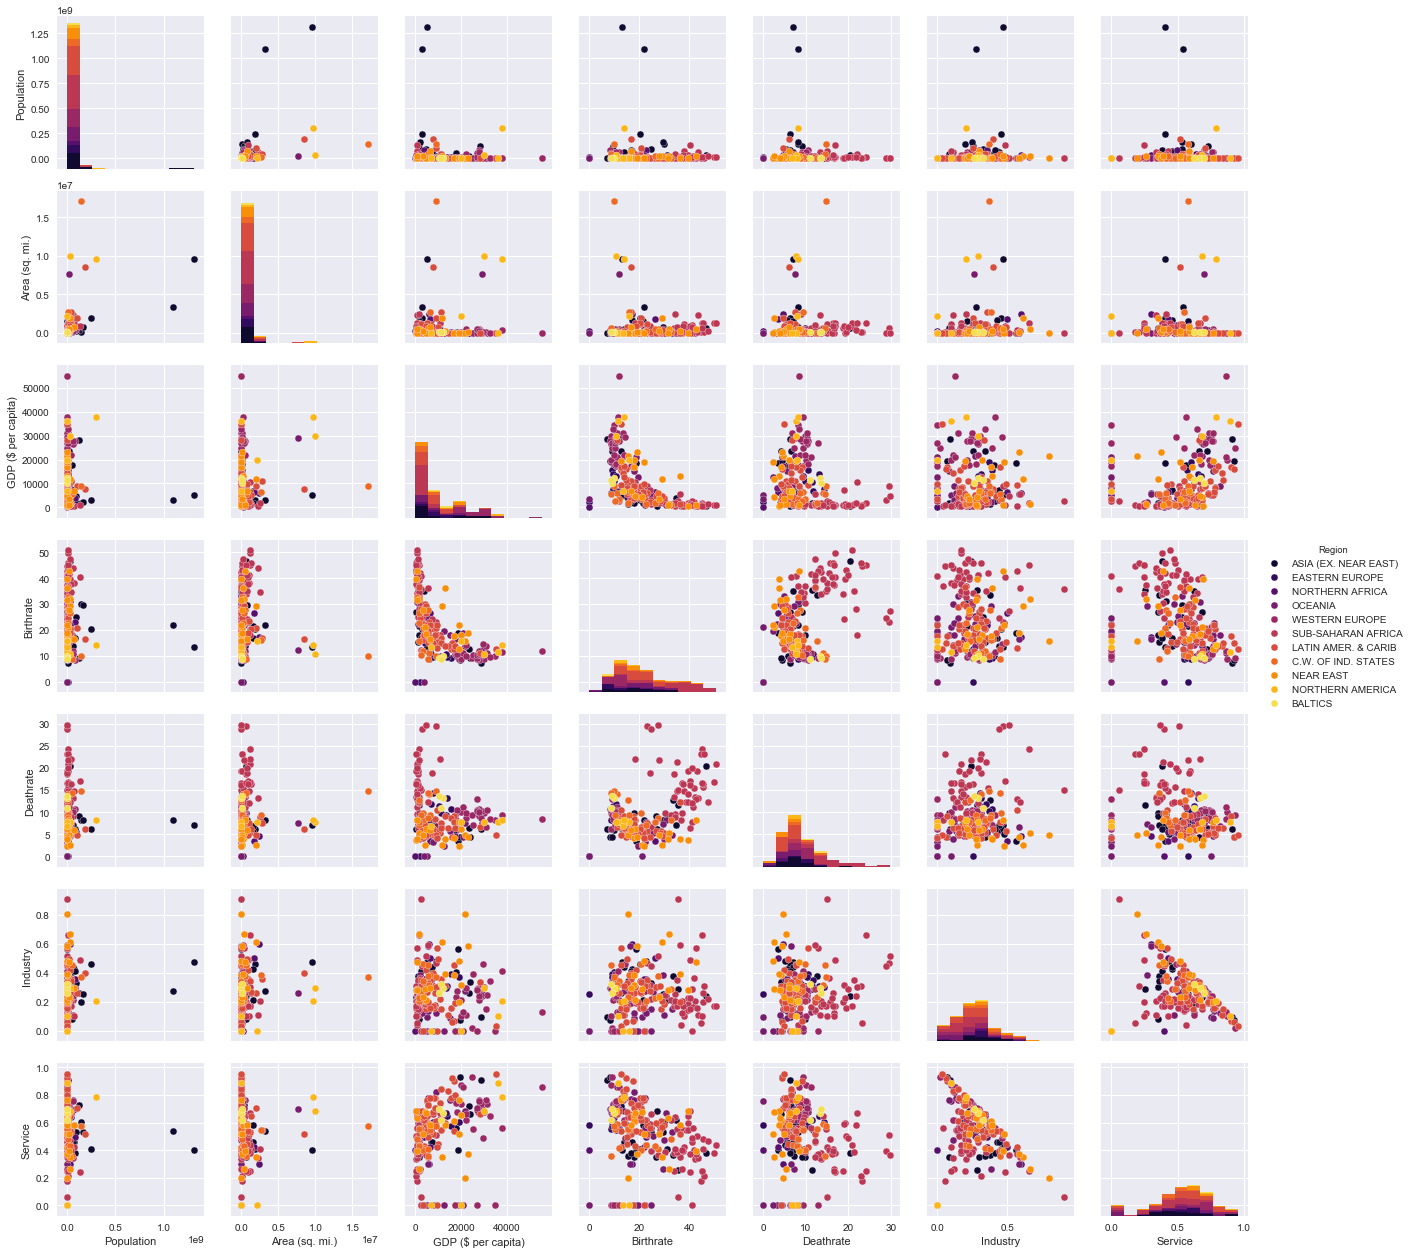

In [41]:
# Pairplot
sns.pairplot(data,palette="inferno", hue="Region",)

plt.plot()

[]

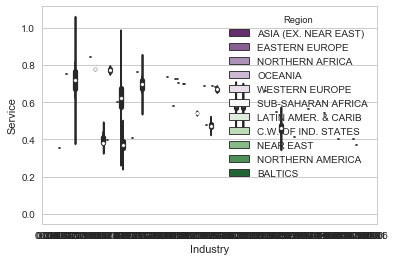

In [42]:
# violin plot
sns.set(style="whitegrid")
sns.violinplot(x="Industry",y="Service",data=data,hue="Region",palette="PRGn")

plt.plot()

[]

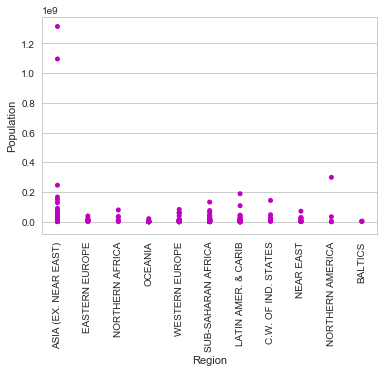

In [43]:
# strip plot
sns.stripplot(x="Region",y="Population",data=data,color="m")

plt.xticks(rotation=90)

plt.plot()

[]

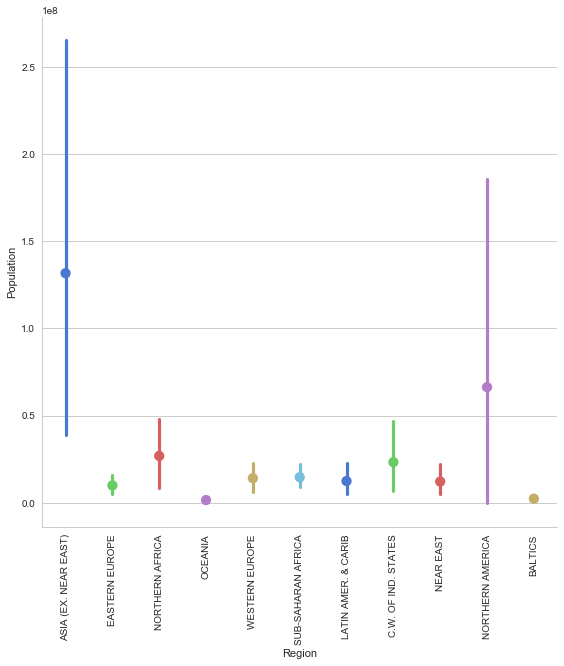

In [44]:
# factor plot
sns.factorplot(x="Region",y="Population",data=data,color="m", kind="point",palette="muted",size=8)

plt.xticks(rotation=90)

plt.plot()

[]

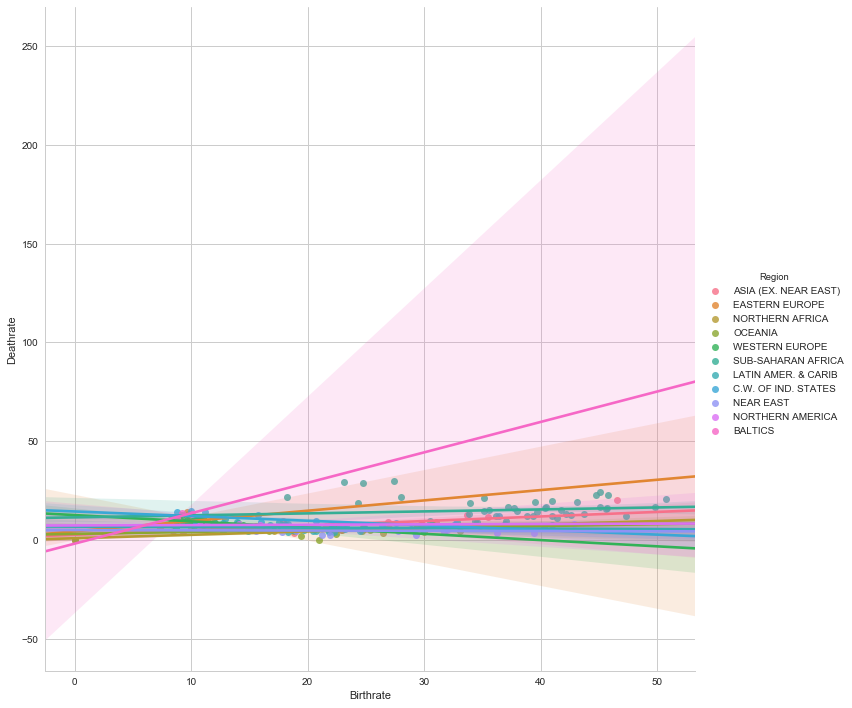

In [45]:
# Lmplot  which is import for machine learning
sns.lmplot(x="Birthrate",y="Deathrate",data=data,size=10,hue="Region")

plt.plot()

[]

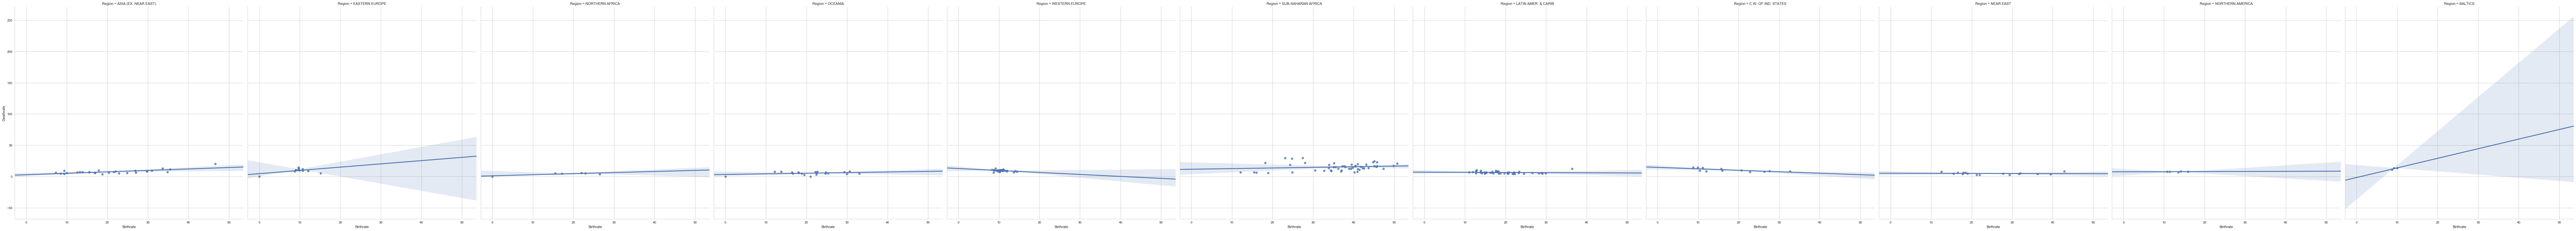

In [47]:
sns.lmplot(x="Birthrate",y="Deathrate",data=data,col="Region",size=10)

plt.plot()